In [236]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', -1)

In [291]:
rental_data = pd.read_csv("rental.csv")

In [292]:
rental_data.shape

(2976, 224)

In [293]:
rental_data.head()

,name,price,latitude,longitude,url,location,room_type,"""24H Maintenance""","""24H On-Site Security""","""24H Surveillance""",...,"""Wine Fridge""","""bathroom_num""","""bedroom_num""","""freezer included""","""fridge included""","""gym""","""internet available""","""meeting room""","""oven included""","""smoker friendly"""
0,120 Raglan Avenue,"1864.0,2003.0,2347.0",43.686516,-79.421005,https://rentals.ca/york/120-raglan-avenue,York,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0', '1.0'","'1.0', '1.0', '2.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,310-312 Lonsdale Road,"2134.0,2475.0",43.689224,-79.411199,https://rentals.ca/toronto/310-312-lonsdale-road,Toronto,"1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0'","'1.0', '2.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35 Walmer Road,"2183.0,2353.0,2888.0",43.668877,-79.405555,https://rentals.ca/toronto/35-walmer-road,Toronto,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0', '1.0'","'1.0', '0.5', '2.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50 Spadina Road,"2549.0,2732.0,3506.0",43.669070,-79.404672,https://rentals.ca/toronto/50-spadina-road,Toronto,"1 Bedroom,Large 1-Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0', '1.0'","'1.0', '1.0', '2.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45 Carlton Street,3700.0,43.661415,-79.380663,https://rentals.ca/toronto/45-carlton-street-2,Toronto,2.5 Bedroom,NaN,NaN,NaN,...,NaN,'2.0','2.5',NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
max(rental_data.longitude), min(rental_data.longitude), max(rental_data.latitude), min(rental_data.latitude)

(-79.183003, -79.6094349999999, 43.8264097, 43.553268)

In [295]:
#Remove various symbols in columns
fixed_columns = []
for col_val in rental_data.columns:
    fixed_columns.append(re.sub(r'\W+', '', col_val.replace('"', '')))

In [296]:
rental_data.columns = fixed_columns

In [297]:
#fill na with 0s
rental_data[['bedroom_num','bathroom_num']] = rental_data[['bedroom_num','bathroom_num']].fillna(value='0')
rental_data = rental_data.fillna(0)

In [298]:
rental_data.head()

,name,price,latitude,longitude,url,location,room_type,24HMaintenance,24HOnSiteSecurity,24HSurveillance,...,WineFridge,bathroom_num,bedroom_num,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
0,120 Raglan Avenue,"1864.0,2003.0,2347.0",43.686516,-79.421005,https://rentals.ca/york/120-raglan-avenue,York,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0', '1.0'","'1.0', '1.0', '2.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,310-312 Lonsdale Road,"2134.0,2475.0",43.689224,-79.411199,https://rentals.ca/toronto/310-312-lonsdale-road,Toronto,"1 Bedroom,2 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0'","'1.0', '2.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35 Walmer Road,"2183.0,2353.0,2888.0",43.668877,-79.405555,https://rentals.ca/toronto/35-walmer-road,Toronto,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0', '1.0'","'1.0', '0.5', '2.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50 Spadina Road,"2549.0,2732.0,3506.0",43.669070,-79.404672,https://rentals.ca/toronto/50-spadina-road,Toronto,"1 Bedroom,Large 1-Bedroom,2 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0', '1.0'","'1.0', '1.0', '2.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45 Carlton Street,3700.0,43.661415,-79.380663,https://rentals.ca/toronto/45-carlton-street-2,Toronto,2.5 Bedroom,0.0,0.0,0.0,...,0.0,'2.0','2.5',0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
#check how many of the properties has the features and store in count_list
count_list = []
column_list = []
for col in [column for column in rental_data.columns[7:] if column != 'bathroom_num' and column != 'bedroom_num']:
    column_list.append(col)
    count_list.append(sum(rental_data[col]))

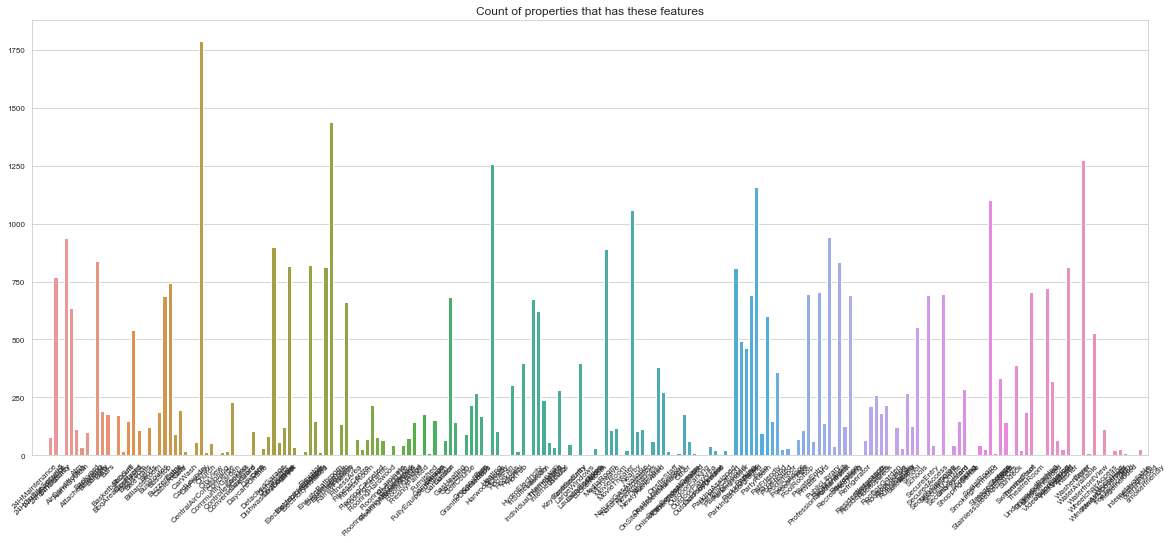

In [300]:
plt.figure(figsize=(20, 8))
count_plot = sns.barplot(column_list, count_list)
for item in count_plot.get_xticklabels():
    item.set_rotation(45)
count_plot.tick_params(labelsize=8)
plt.title("Count of properties that has these features")
plt.show()

In [301]:
#Check number of properties greater than a threshold
sum(np.array(count_list) >= 30)

132

In [302]:
#Sanity check to see if there are non str in the column
for i in rental_data.bedroom_num:
    if type(i) != str:
        print(i)

In [345]:
#Expand price, room type, bedroom, bathroom into multiple rows
name_cols = ["price", "url", "room_type", "bedroom_num", "bathroom_num"]
result_price = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.price.split(",")])
result_room = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.room_type.split(",")])
result_bednum = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.bedroom_num.split(",")])
result_bathnum = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.bathroom_num.split(",")])
concat_result = pd.concat([result_price, result_room], axis = 1).iloc[:, :-1]
concat_result_2 = pd.concat([concat_result, result_bednum], axis = 1).iloc[:, :-1]
concat_result_3 = pd.concat([concat_result_2, result_bathnum], axis = 1).iloc[:, :-1]
concat_result_3.columns = name_cols
concat_result_3.head()

,price,url,room_type,bedroom_num,bathroom_num
0,1864.0,https://rentals.ca/york/120-raglan-avenue,Jr. 1 Bedroom,'1.0','1.0'
1,2003.0,https://rentals.ca/york/120-raglan-avenue,1 Bedroom,'1.0','1.0'
2,2347.0,https://rentals.ca/york/120-raglan-avenue,2 Bedroom,'2.0','1.0'
3,2134.0,https://rentals.ca/toronto/310-312-lonsdale-road,1 Bedroom,'1.0','1.0'
4,2475.0,https://rentals.ca/toronto/310-312-lonsdale-road,2 Bedroom,'2.0','1.0'


In [346]:
def convert_str_to_num(x):
    num = 0
    for char in x:
        step = 0
        if char.isdigit():
            if step == 0:
                num += float(char)
                step += 1
            else:
                num += float(char)/10
    return num

In [347]:
concat_result_3['bedroom_num'] = concat_result_3['bedroom_num'].apply(lambda x: convert_str_to_num(x))
concat_result_3['bathroom_num'] = concat_result_3['bathroom_num'].apply(lambda x: convert_str_to_num(x))

In [348]:
test_df = rental_data.drop(columns=['price', 'room_type', 'bathroom_num', 'bedroom_num'])

In [349]:
test_df.head()

,name,latitude,longitude,url,location,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,24hSecurity,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
0,120 Raglan Avenue,43.686516,-79.421005,https://rentals.ca/york/120-raglan-avenue,York,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,310-312 Lonsdale Road,43.689224,-79.411199,https://rentals.ca/toronto/310-312-lonsdale-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35 Walmer Road,43.668877,-79.405555,https://rentals.ca/toronto/35-walmer-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50 Spadina Road,43.669070,-79.404672,https://rentals.ca/toronto/50-spadina-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45 Carlton Street,43.661415,-79.380663,https://rentals.ca/toronto/45-carlton-street-2,Toronto,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [350]:
processed_rental = pd.merge(concat_result_3,test_df,on=['url'])
processed_rental.shape

(3730, 224)

In [351]:
processed_rental.head()

,price,url,room_type,bedroom_num,bathroom_num,name,latitude,longitude,location,24HMaintenance,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
0,1864.0,https://rentals.ca/york/120-raglan-avenue,Jr. 1 Bedroom,1.0,1.0,120 Raglan Avenue,43.686516,-79.421005,York,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003.0,https://rentals.ca/york/120-raglan-avenue,1 Bedroom,1.0,1.0,120 Raglan Avenue,43.686516,-79.421005,York,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2347.0,https://rentals.ca/york/120-raglan-avenue,2 Bedroom,2.0,1.0,120 Raglan Avenue,43.686516,-79.421005,York,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2134.0,https://rentals.ca/toronto/310-312-lonsdale-road,1 Bedroom,1.0,1.0,310-312 Lonsdale Road,43.689224,-79.411199,Toronto,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2475.0,https://rentals.ca/toronto/310-312-lonsdale-road,2 Bedroom,2.0,1.0,310-312 Lonsdale Road,43.689224,-79.411199,Toronto,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
# def convert_bedroom(room):
#     room = re.sub('[^a-zA-Z0-9 \n\.]', ' ', room)
    
#     if len(room.split()) == 1:
#         if room.startswith('1BR'):
#             return 1
#         elif room.startswith('2BR'):
#             return 2
#         elif room.startswith('3BR'):
#             return 3
#     else:
#         if (room.split()[0] == '1' or room.split()[0].lower() == 'one' or room.split()[0] == '1.0' or
#             room.split()[1] == '1' or room.split()[1].lower() == 'one' or room.startswith('1BR') or
#             room.split()[1] == '1BR' or room == '2304 Weston Rd   Plan I' or room == 'Garden Villas'):
#             return 1
#         if (room.split()[0] == '2' or room.split()[0].lower() == 'two' or room.split()[0] == '2.0' or
#             room.split()[1] == '2' or room.split()[1].lower() == 'two' or room.startswith('2BR') or
#             room.split()[1] == '2BR' or room == '2336 Weston Rd   Plan A' or room == 'Garden Villa 2 bedroom suite'):
#             return 2
#         if (room.split()[0] == '3' or room.split()[0].lower() == 'three' or room.split()[0] == '3.0' or
#             room.split()[1] == '3' or room.split()[1].lower() == 'three' or room.startswith('3BR') or
#             room.split()[1] == '3BR'):
#             return 3
#         if (room.split()[0] == '4' or room.split()[0].lower() == 'four' or room.split()[0] == '4.0' or
#             room.split()[1] == '4' or room.split()[1].lower() == 'four' or room.startswith('4BR')):
#             return 4
#         if room.split()[0] == '5':
#             return 5
#         if room.split()[0] == '6':
#             return 6
#         if (room.split()[0] == '0' or room.split()[0] == '0.0' or room.split()[0] == '0.5' or
#             room.startswith('Bachelor') or room == 'Furnished Studio' or room == '4K Spadina Avenue' or
#            room == '461 Adelaide Street West' or room == '25 Lower Simcoe' or room == 'Condo Unit' or
#            room == '637 Lakeshore Blvd'):
#             return 0.5
#         if room == '1.5 Bedroom' or room == 'Jr Suite':
#             return 1.5
#         if room == '2.5 Bedroom':
#             return 2.5
#         if room == '3.5 Bedroom':
#             return 3.5
#         if room == '4.5 Bedroom':
#             return 4.5
#         else:
#             return room

In [222]:
# processed_rental['bedroom_num'] = processed_rental.room_type.apply(lambda x: convert_bedroom(x))
# processed_rental['bedroom_num'] = processed_rental['bedroom_num'].fillna(value=0)

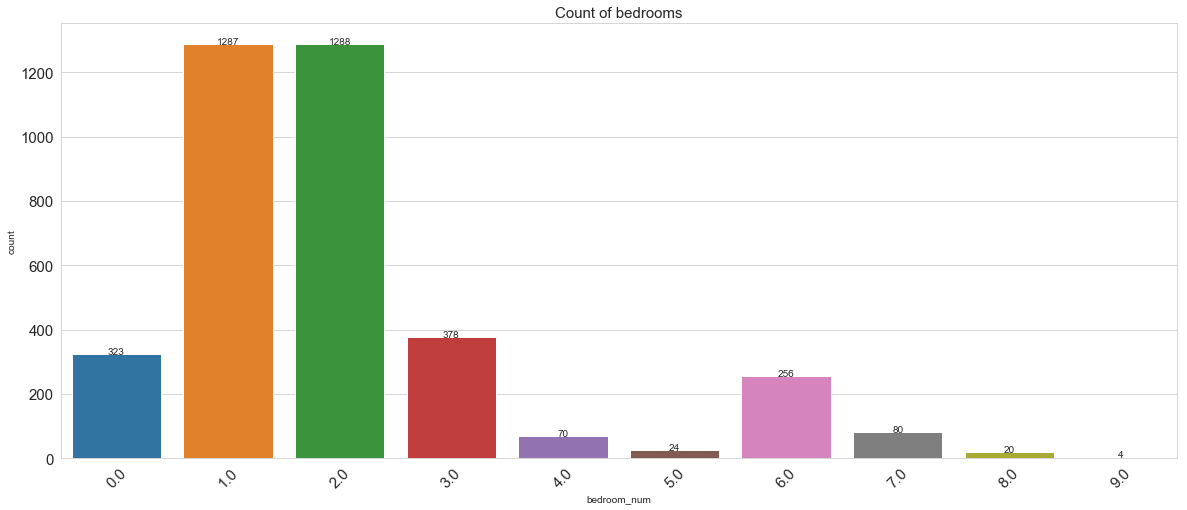

In [352]:
plt.figure(figsize=(20, 8))
count_plot = sns.countplot(processed_rental.bedroom_num)
for item in count_plot.get_xticklabels():
    item.set_rotation(45)
count_plot.tick_params(labelsize=15)
for p in count_plot.patches:
    height = p.get_height()
    count_plot.text(p.get_x()+p.get_width()/2., height,height,ha="center")
plt.title("Count of bedrooms", fontsize = 15)
plt.show()

In [353]:
processed_rental.location.unique()

array(['York', 'Toronto', 'NorthYork', 'Etobicoke', 'Mississauga',
       'Scarborough', 'EastYork', 'Vaughan', 'Markham', 'Thornhill'],
      dtype=object)

In [354]:
max(processed_rental.price), min(processed_rental.price)

('9800.0', '1000.0')

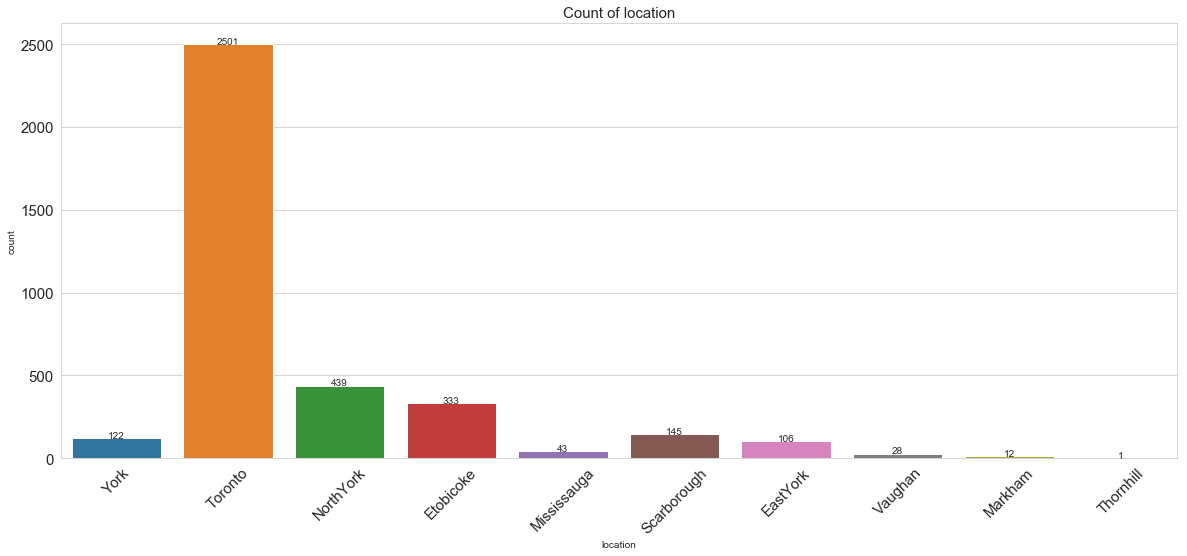

In [355]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
count_plot = sns.countplot(processed_rental.location)
for item in count_plot.get_xticklabels():
    item.set_rotation(45)
count_plot.tick_params(labelsize=15)
plt.title("Count of location", fontsize = 15)
for p in count_plot.patches:
    height = p.get_height()
    count_plot.text(p.get_x()+p.get_width()/2., height,height,ha="center")
plt.show()

In [356]:
processed_rental.price = processed_rental.price.astype(float)

In [357]:
def div_region(col, num_of_region = 10):
    final = {}
    max_num, min_num = 7741.5, min(col)
    interegion = (max_num - min_num)/10
    start = min_num
    for i in range(10):
        num = sum(col <= start + interegion) - sum(col <= start)
        final[str(round(start, 2)) + " ~ " + str(round(start + interegion, 2))] = num
        start += interegion
    return final

In [358]:
div_region(processed_rental.price)

{'345.0 ~ 1084.65': 50,
 '1084.65 ~ 1824.3': 651,
 '1824.3 ~ 2563.95': 1903,
 '2563.95 ~ 3303.6': 768,
 '3303.6 ~ 4043.25': 224,
 '4043.25 ~ 4782.9': 52,
 '4782.9 ~ 5522.55': 31,
 '5522.55 ~ 6262.2': 19,
 '6262.2 ~ 7001.85': 16,
 '7001.85 ~ 7741.5': 3}

In [359]:
processed_rental[processed_rental.price == 25000]

,price,url,room_type,bedroom_num,bathroom_num,name,latitude,longitude,location,24HMaintenance,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
2943,25000.0,https://rentals.ca/toronto/311-bay-street-id316280,2 bedroom,2.0,3.0,311 Bay Street,43.649684,-79.380413,Toronto,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [360]:
processed_rental.describe()

,price,bedroom_num,bathroom_num,latitude,longitude,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,24hSecurity,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
count,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,...,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000
mean,2417.295088,2.061394,1.449866,43.678308,-79.403613,0.001340,0.003485,0.005630,0.024129,0.211260,...,0.001340,0.046113,0.000268,0.008847,0.009651,0.003485,0.001609,0.000804,0.009383,0.001072
std,963.135914,1.674100,1.000017,0.046870,0.061195,0.036593,0.058941,0.074832,0.153469,0.408257,...,0.036593,0.209757,0.016374,0.093655,0.097780,0.058941,0.040080,0.028352,0.096425,0.032734
min,345.000000,0.000000,0.000000,43.553268,-79.609435,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1900.000000,1.000000,1.000000,43.645586,-79.421630,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2250.000000,2.000000,1.000000,43.663303,-79.392457,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2700.000000,2.000000,2.000000,43.704193,-79.377195,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25000.000000,9.000000,7.000000,43.826410,-79.183003,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [361]:
sum([1 for item in processed_rental.room_type if "den" in item.lower()])

55

In [362]:
#Remove duplicates
processed_rental = processed_rental.drop_duplicates()
sum(processed_rental.duplicated())

0

In [363]:
processed_rental.shape

(3640, 224)